# Reinforcement Learning
### Multi-armed bandit and $\epsilon$-greedy

The **multi-armed bandit** is a classic **Reinforcement Learning** (RL), and it is named after slot machines (one-armed bandits). Here, a decision maker (agent) iteratively selects one of the available arms (you may call them arms, actions, or choices).
<br> In the problem, each machine provides a random reward from a probability distribution specific to that machine, that is not known a priori. The objective of the gambler (decision-maker or agent) is to maximize the sum of rewards earned through a sequence of pulling arms. The agent has to simultaneously acquire new knowledge, called **exploration**, and optimize its decisions based on existing knowledge, called **exploitation**. The agent thus attempts to balance these competing tasks in order to maximize their total value over the period of time considered. 
<br>Here, we use the $\epsilon$-greedy algorithm ($\epsilon \in [0,1]$), which is specified as:
 - With probability $\epsilon$: Explore (choose a random arm).
 - With probability $1-\epsilon$: Exploit (choose the arm with the highest estimated reward).

The **estimated expected reward** $q(a_t)$ for action $a_t$ at time $t$ is often computed by the incremental sample average updating rule:
<br><br>$\large q(a_t)\leftarrow q(a_t)+\alpha (r_t-q(a_t))$, where $\large \alpha=\frac{1}{N(a_t)}$
<br><br> The term $N(a_t)$ denotes the number of times the arm $a_t$ has been pulled so far. Also, $r_t$ is the reward received after pulling arm $a_t$.
<hr>

In the following, we simulate a multi-armed bandit by a few stationary distributions. Then, we use the $\epsilon$-greedy algorithm to guide the agent to choose the best arm based on the strategy. So, at each time step $t$, the agent:
 - Chooses an arm $a_t$ with the $\epsilon$-greedy strategy.
 - Receives a reward $r_t$ according to the reward distribution of arm $a_t$.
 - Updates the estimate of the arm’s reward $q(a_t)$.
        
<hr>
https://github.com/ostad-ai/Reinforcement-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Reinforcement-Learning

In [1]:
# Import required modules
import random
import matplotlib.pyplot as plt

In [2]:
# Simulates a multi-armed bandit with given true reward means
# The number of arms is equal to the number of means
class MultiArmedBandit:
    def __init__(self, true_means):        
        self.true_means = true_means
        self.n_arms = len(true_means)
    # Pulls an arm and returns a stochastic reward
    def pull(self, arm):        
        # Gaussian reward
        return random.normalvariate(mu=self.true_means[arm],
                                    sigma=1.0)
        # Alternative, Bernoulli reward 0 or 1

In [3]:
# ε-Greedy algorithm for action selection
# the number of arms: n_arms
class EpsilonGreedy:
    def __init__(self, n_arms, epsilon=0.1):
        self.epsilon = epsilon
        self.n_arms = n_arms
        self.q = [0.]*n_arms  # Estimated rewards for each arm
        self.N = [0]*n_arms  # Number of times each arm was pulled
   
    # Selects an arm based on ε-greedy strategy.  
    def select_arm(self): 
        if random.random() < self.epsilon:
            return random.randrange(self.n_arms)  # Explore: random arm
        else:
            # Exploit: best estimated arm
            return max(list(range(len(self.q))),key=lambda i:self.q[i]) 
    
    # Updates the estimated reward for the chosen arm.   
    def update(self, arm, reward): 
        self.N[arm] += 1
        # Incremental sample average
        self.q[arm] += (reward - self.q[arm]) / self.N[arm]  

In [4]:
# Runs the multi-armed bandit (MAB) with ε-greedy algorithm.
def solve_MAB(true_means, n_steps=1000, epsilon=0.1):
    ma_bandit = MultiArmedBandit(true_means)
    agent = EpsilonGreedy(n_arms=len(true_means), epsilon=epsilon)
    rewards =[]
    reward_cumsum=0
    rewards_ave=[]
    for t in range(n_steps):
        arm = agent.select_arm()  # Choose action
        reward = ma_bandit.pull(arm)  # Get reward from environment
        agent.update(arm, reward)  # Update agent's estimates
        rewards.append(reward)    
        reward_cumsum+=reward
        rewards_ave.append(reward_cumsum/(t+1))
    return rewards,rewards_ave,agent

In [5]:
# Example
# True reward probabilities for 3 arms (arm 2 is optimal)
true_means = [0.3, 0.5, 0.7]
# Run simulation
rewards,rewards_ave,agent = solve_MAB(true_means, 
                        n_steps=2000, epsilon=0.1)
print(f"Cumulative reward: {sum(rewards)}")
print(f"Average reward: {rewards_ave[-1]}")
# How many times each arm was pulled
print(f"Arm selection counts: {agent.N}")  
print(f'estimated expected reward:{agent.q}')
print(f'The best Arm: {agent.q.index(max(agent.q))}')

Cumulative reward: 1306.7482017155642
Average reward: 0.6533741008577821
Arm selection counts: [60, 573, 1367]
estimated expected reward:[0.356639816554844, 0.47338024831066383, 0.7418455965181178]
The best Arm: 2


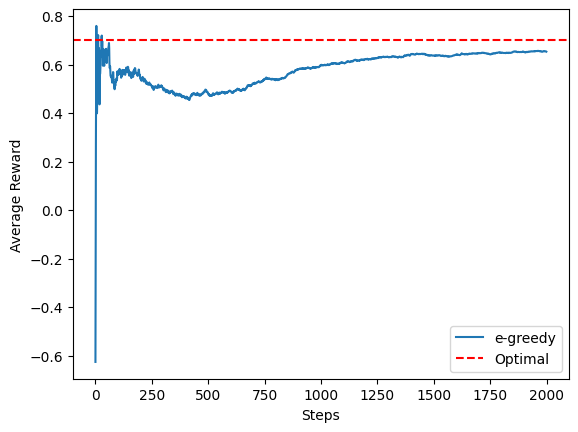

In [6]:
# Display the optimal expected reward and the ε-Greedy reward
plt.plot(rewards_ave,label='e-greedy')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.axhline(y=max(true_means), color='r', linestyle='--', label="Optimal")
plt.legend()
plt.show()